In [8]:
import numpy as np
import torch
import cv2
import math
import matplotlib.pyplot as plt

In [11]:

def extract_patches_parallel(image, patch_size, stride):
    patches = []
    positions = []
    
    # Get image dimensions
    height, width, channels = image.shape
    
    # Calculate grid positions
    for y in range(0, height - patch_size + 1, stride):
        for x in range(0, width - patch_size + 1, stride):
            # Extract patch
            patch = image[y:y+patch_size, x:x+patch_size]
            patches.append(patch)
            positions.append((x, y))
    
    # Convert to numpy array then to tensor for parallel processing
    patches_array = np.array(patches)  # Shape: (N, patch_size, patch_size, channels)
    
    # Convert to PyTorch tensor and rearrange dimensions for CNN
    # CNN expects: (batch_size, channels, height, width)
    patches_tensor = torch.from_numpy(patches_array).float()
    patches_tensor = patches_tensor.permute(0, 3, 1, 2)  # (N, C, H, W) N->no of patches, C->channels, H->height, W->width
    
    return patches_tensor, positions ,patches_array

In [ ]:
image = cv2.imread(r"D:\research implementation\tester image.jpeg")  #  Replace with your actual image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
patch_size = 32
stride = 16

patches, positions , normal_patches= extract_patches_parallel(image, patch_size, stride)

In [7]:
print(f"Extracted {len(patches)} patches of size {patch_size}x{patch_size} with stride {stride}.")

Extracted 120 patches of size 32x32 with stride 16.


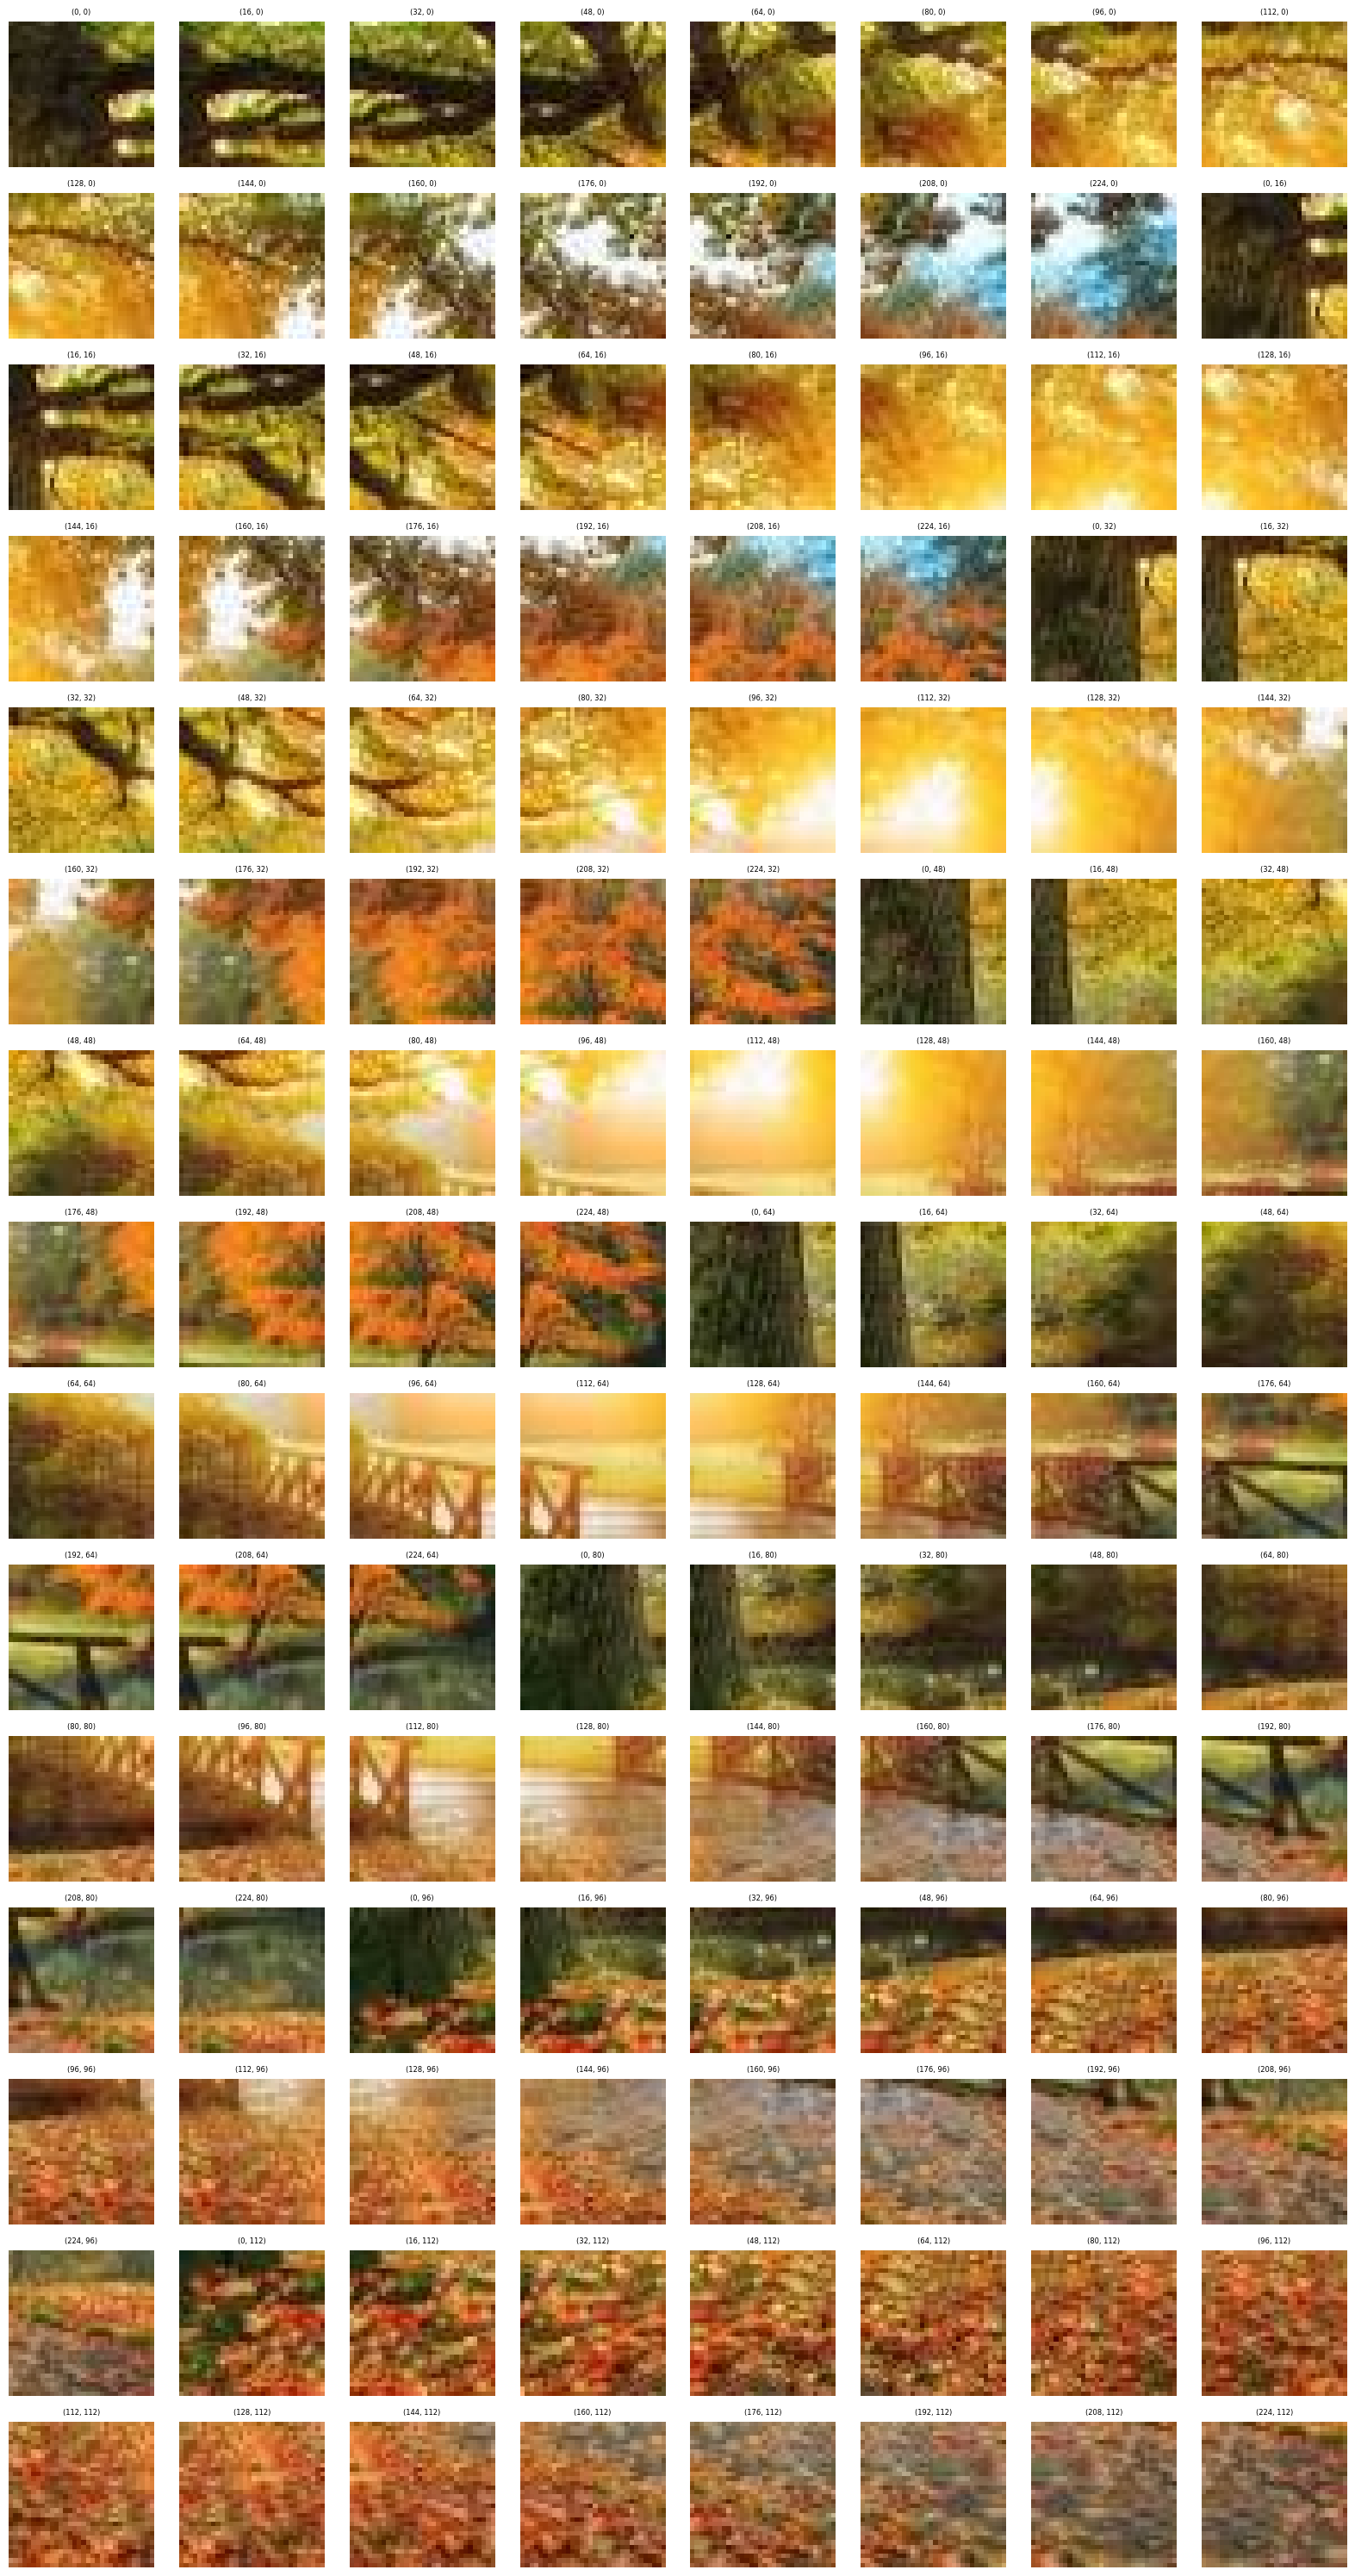

In [13]:
num_patches = len(patches)
cols = 8  # Or change this to control how many patches per row
rows = math.ceil(num_patches / cols)

# --- Display all patches ---
plt.figure(figsize=(cols * 2, rows * 2))
for i in range(num_patches):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(normal_patches[i])
    plt.title(f"{positions[i]}", fontsize=6)
    plt.axis('off')

plt.tight_layout()
plt.show()